<a href="https://colab.research.google.com/github/Nell87/drivendata_richter/blob/main/script/03_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baseline Model (Random Forest)
This first model will be used as comparison for the performance of next ones. 

### **INCLUDES**


In [4]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.3
!pip install pretty-confusion-matrix

Found existing installation: matplotlib 3.2.2
Uninstalling matplotlib-3.2.2:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.2.2-py3.8-nspkg.pth
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.2.2.dist-info/*
    /usr/local/lib/python3.8/dist-packages/matplotlib.libs/libpng16-cfdb1654.so.16.21.0
    /usr/local/lib/python3.8/dist-packages/matplotlib.libs/libz-a147dcb0.so.1.2.3
    /usr/local/lib/python3.8/dist-packages/matplotlib/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.8/dist-packages/pylab.py
Proceed (Y/n)? y
  Successfully uninstalled matplotlib-3.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.9/201.9 KB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.7/156.7 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 KB

In [5]:
####    0. INCLUDES  _______________________________________ #### 
#Loading Libraries:# 
import pandas as pd
import time   #  provides many ways of representing time in code

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from pretty_confusion_matrix import pp_matrix_from_data
from sklearn.metrics import f1_score   # the score used in the competition

####   1. READING TRAIN AND TEST DATA _______________________________________ #### 
train_values= data = pd.read_csv("https://raw.githubusercontent.com/Nell87/drivendata_richter/main/data/train_values.csv",index_col='building_id')
train_labels = pd.read_csv("https://raw.githubusercontent.com/Nell87/drivendata_richter/main/data/train_labels.csv",index_col='building_id')
test = pd.read_csv("https://raw.githubusercontent.com/Nell87/drivendata_richter/main/data/test_values.csv",index_col='building_id')

### **PREPROCESSING**
- Removing outliers
-Dummify 
- Split in train/test

#### **Preprocessing: Removing outliers**
- Get rid of buildings with more than 3 floors. 
- IQR based removal on age, area_percentage and height_percentage

In [ ]:
# Removing outliers
train_merge = train_merge[train_merge['count_floors_pre_eq'] <= 3]
train_merge = train_merge[train_merge['count_families'] > 3]
train_merge = rem_outliers_IQR(train_merge, 'age')
train_merge = rem_outliers_IQR(train_merge, 'area_percentage')
train_merge = rem_outliers_IQR(train_merge, 'height_percentage')


#### **Preprocessing: Dummify**

In [6]:
# Dummify
train_values = pd.get_dummies(train_values, drop_first = True)

#### **Preprocessing: Split in train/test**

In [7]:
# Split in train/test
x_train, x_test, y_train, y_test = train_test_split(train_values, train_labels, test_size = 0.2, random_state = 42)

### **MODELING**
Let's train the baseline model: Random Forest. I'll obtain the best parameters through GridSearch using my own computer to speed up the process.

In [8]:
#### 3.  MODELING     _______________________________________ #### 
# Create the RF object
# rf_clf = RandomForestClassifier(random_state=314) 

# Best parameters (auto deprecated???) # 1141 seg (19 m)
#param_grid = { 
#     'n_estimators': [100, 200],
#    'max_features': ['none', 'auto', 'sqrt', 'log2'],
#    'max_depth' : [1,10],
#    'min_samples_leaf' : [10,20]
#}

#start_time = time.time()
#rf_clf_GS = GridSearchCV(rf_clf, param_grid, cv=5)
#rf_clf_GS.fit(x_train, y_train)
#dt_time_fit = time.time() - start_time
#rf_clf_GS.best_params_

# Train using the best parameters  # 12 seg
rf_clf_1 = RandomForestClassifier(random_state=314, n_estimators = 100,
                                  max_features = 'auto', max_depth = 10,
                                  min_samples_leaf = 20)
                                  
                                  
start_time = time.time()
rf_clf_1 = rf_clf_1.fit(x_train, y_train)  
rf_clf_1_time_fit = time.time() - start_time       

<ipython-input-8-1a1459b8b8a8>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf_1 = rf_clf_1.fit(x_train, y_train)


### **PREDICTIONS**

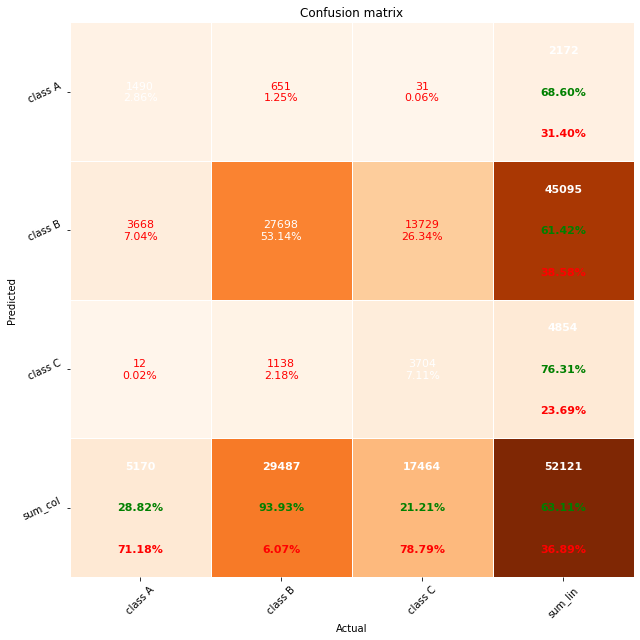

In [ ]:
#### 4.  PREDICTIONS     _______________________________________ #### 

#Predictions to check # 0.631
pred_rf_clf_1 = rf_clf_1.predict(x_test)
f1_score(y_test,pred_rf_clf_1, average='micro')

# confusion matrix
confusion_matrix(y_test,pred_rf_clf_1)
pp_matrix_from_data(y_test, pred_rf_clf_1)


In [ ]:
# Predictions to send # 0.6312 on competition (1469 / 5974)
test = pd.get_dummies(test, drop_first = True)
pred_rf_clf_1_final = rf_clf_1.predict(test)

my_submission = pd.read_csv("https://raw.githubusercontent.com/Nell87/drivendata_richter/main/data/submission_format.csv",
                            index_col='building_id')
                            
my_submission = pd.DataFrame(data=pred_rf_clf_1_final,
                             columns=my_submission.columns,
                             index=my_submission.index)

my_submission.head()
# my_submission.to_csv('../data/submission_rf_clf_1.csv')

,damage_grade
building_id,
300051,3
99355,2
890251,2
745817,1
421793,3
